# Global Optimization (Basin Hopping)

In [1]:
from optiland import optic, optimization

Define a starting lens:

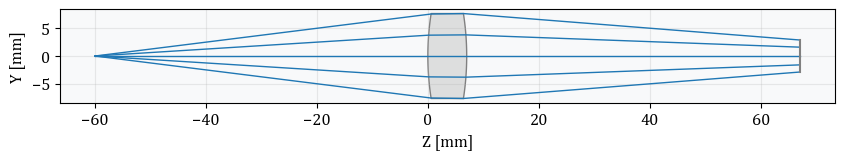

In [2]:
lens = optic.Optic()

# add surfaces
lens.add_surface(index=0, thickness=60)
lens.add_surface(index=1, thickness=7, radius=50, material="N-SF2", is_stop=True)
lens.add_surface(index=2, thickness=60, radius=-50)
lens.add_surface(index=3)

# set aperture
lens.set_aperture(aperture_type="EPD", value=15)

# add field
lens.set_field_type(field_type="object_height")
lens.add_field(y=0)

# add wavelength
lens.add_wavelength(value=0.55, is_primary=True)

# draw lens
lens.draw(num_rays=5)

Define optimization problem:

In [3]:
problem = optimization.OptimizationProblem()

Add operands (targets for optimization):

In [ ]:
# RMS spot size target
for field in lens.fields.get_field_coords():
    input_data = {
        "optic": lens,
        "Hx": field[0],
        "Hy": field[1],
        "surface_number": -1,
        "num_rays": 5,
        "wavelength": 0.55,
        "distribution": "hexapolar",
    }
    problem.add_operand(
        operand_type="rms_spot_size",
        target=0,
        weight=1,
        input_data=input_data,
    )

Define variables - we let the Zernike coefficients vary.

In [5]:
problem.add_variable(lens, "radius", surface_number=1)
problem.add_variable(lens, "radius", surface_number=2)

Check initial merit function value and system properties:

In [6]:
problem.info()

╒════╤════════════════════════╤═══════════════════╕
│    │   Merit Function Value │   Improvement (%) │
╞════╪════════════════════════╪═══════════════════╡
│  0 │                   5.27 │                 0 │
╘════╧════════════════════════╧═══════════════════╛
╒════╤════════════════╤══════════╤══════════════╤══════════════╤══════════╤═════════╤═════════╤════════════════╕
│    │ Operand Type   │   Target │ Min. Bound   │ Max. Bound   │   Weight │   Value │   Delta │   Contrib. [%] │
╞════╪════════════════╪══════════╪══════════════╪══════════════╪══════════╪═════════╪═════════╪════════════════╡
│  0 │ rms spot size  │        0 │              │              │        1 │   2.296 │   2.296 │            100 │
╘════╧════════════════╧══════════╧══════════════╧══════════════╧══════════╧═════════╧═════════╧════════════════╛
╒════╤═════════════════╤═══════════╤═════════╤══════════════╤══════════════╕
│    │ Variable Type   │   Surface │   Value │ Min. Bound   │ Max. Bound   │
╞════╪═══════════════

Define optimizer:

In [7]:
optimizer = optimization.BasinHopping(problem)

Run optimization:

In [8]:
optimizer.optimize()

                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: 0.02367681204887082
                          x: [-6.020e-01 -1.416e+00]
                        nit: 100
      minimization_failures: 25
                       nfev: 14164
                       njev: 4631
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: 0.02367681204887082
                                    x: [-6.020e-01 -1.416e+00]
                                  nit: 32
                                  jac: [ 8.434e-06 -6.044e-06]
                             hess_inv: [[ 1.486e+00  1.625e+00]
                                        [ 1.625e+00  1.780e+00]]
                                 nfev: 126
                                 njev: 42

Print merit function value and system properties after optimization:

In [9]:
problem.info()

╒════╤════════════════════════╤═══════════════════╕
│    │   Merit Function Value │   Improvement (%) │
╞════╪════════════════════════╪═══════════════════╡
│  0 │              0.0236768 │           99.5507 │
╘════╧════════════════════════╧═══════════════════╛
╒════╤════════════════╤══════════╤══════════════╤══════════════╤══════════╤═════════╤═════════╤════════════════╕
│    │ Operand Type   │   Target │ Min. Bound   │ Max. Bound   │   Weight │   Value │   Delta │   Contrib. [%] │
╞════╪════════════════╪══════════╪══════════════╪══════════════╪══════════╪═════════╪═════════╪════════════════╡
│  0 │ rms spot size  │        0 │              │              │        1 │   0.154 │   0.154 │            100 │
╘════╧════════════════╧══════════╧══════════════╧══════════════╧══════════╧═════════╧═════════╧════════════════╛
╒════╤═════════════════╤═══════════╤══════════╤══════════════╤══════════════╕
│    │ Variable Type   │   Surface │    Value │ Min. Bound   │ Max. Bound   │
╞════╪═════════════

Draw final lens:

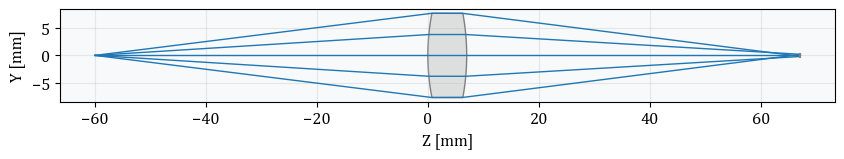

In [10]:
lens.draw(num_rays=5)